# EDA

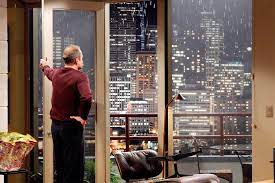

In [70]:

import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

This is the very first data analysis I do on my own. Please take the informations on this notebook with a grain of salt. With this EDA I will: 
**A. get and show insights from the data given 
**B. make good research questions on data and hypothesis that are focused on the clients need on housing (Larry Sanders)
<br>Client:<br> 
<br>
| Larry Sanders       | Buyer       | Waterfront , limited budget, nice & isolated but central neighborhood without kids (but got some of his own, just doesn't want his kids to play with other kids .. because of germs) |

In [71]:
# making a pandas dataframe from the csv data
df_king_county_housing = pd.read_csv("data/king_county_house.csv")
df_king_county_housing.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5
5,7237550310,4.000,4.500,5420.000,101930.000,1.000,0.000,0.000,3,11,...,0.000,98053,47.656,-122.005,4760.000,101930.000,2014-05-12,1230000.000,7237550310,6
6,1321400060,3.000,2.250,1715.000,6819.000,2.000,0.000,0.000,3,7,...,0.000,98003,47.310,-122.327,2238.000,6819.000,2014-06-27,257500.000,1321400060,7
7,2008000270,3.000,1.500,1060.000,9711.000,1.000,0.000,NaN,3,7,...,0.000,98198,47.410,-122.315,1650.000,9711.000,2015-01-15,291850.000,2008000270,8
8,2414600126,3.000,1.000,1780.000,7470.000,1.000,0.000,0.000,3,7,...,0.000,98146,47.512,-122.337,1780.000,8113.000,2015-04-15,229500.000,2414600126,9
9,3793500160,3.000,2.500,1890.000,6560.000,2.000,0.000,0.000,3,7,...,0.000,98038,47.368,-122.031,2390.000,7570.000,2015-03-12,323000.000,3793500160,10


In [72]:
df_king_county_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

Can see that a view columns are missing values: waterfront , views , sqft_basement, yr_renovated <br>
Important for our client from these columns waterfront, (probably) view

In [73]:
df_stats = df_king_county_housing.describe()
print(df_stats)

                  id  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count      21597.000 21597.000  21597.000    21597.000   21597.000 21597.000   
mean  4580474287.771     3.373      2.116     2080.322   15099.409     1.494   
std   2876735715.748     0.926      0.769      918.106   41412.637     0.540   
min      1000102.000     1.000      0.500      370.000     520.000     1.000   
25%   2123049175.000     3.000      1.750     1430.000    5040.000     1.000   
50%   3904930410.000     3.000      2.250     1910.000    7618.000     1.500   
75%   7308900490.000     4.000      2.500     2550.000   10685.000     2.000   
max   9900000190.000    33.000      8.000    13540.000 1651359.000     3.500   

       waterfront      view  condition     grade  ...  yr_built  yr_renovated  \
count   19206.000 21534.000  21597.000 21597.000  ... 21597.000     17749.000   
mean        0.008     0.234      3.410     7.658  ...  1971.000       836.651   
std         0.087     0.766      0.6

In [74]:
df_king_county_housing.duplicated().value_counts()
##so no duplicates 

False    21597
Name: count, dtype: int64

Data Cleaning steps are following e.g: Right datatype formatting etc.

In [75]:
df_king_county_housing['date'] = pd.to_datetime(df_king_county_housing['date'], format='%Y-%m-%d')
type(df_king_county_housing['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [76]:
df_king_county_housing.head()
df_king_county_housing = df_king_county_housing.astype({'bedrooms': 'Int64'})


In [77]:
#df_king_county_housing['bathrooms'] = df_king_county_housing.bathrooms.round(0)
#df_king_county_housing = df_king_county_housing.astype({'bathrooms': 'Int64'})

df_client_kcounty_housing = df_king_county_housing[['id','price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']].copy()
df_client_kcounty_housing

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.000,3,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,98178,47.511,-122.257,1340.000,5650.000
1,6414100192,538000.000,3,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,98125,47.721,-122.319,1690.000,7639.000
2,5631500400,180000.000,2,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,98028,47.738,-122.233,2720.000,8062.000
3,2487200875,604000.000,4,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,98136,47.521,-122.393,1360.000,5000.000
4,1954400510,510000.000,3,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,98074,47.617,-122.045,1800.000,7503.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.000,3,2.500,1530.000,1131.000,3.000,0.000,0.000,3,8,98103,47.699,-122.346,1530.000,1509.000
21593,6600060120,400000.000,4,2.500,2310.000,5813.000,2.000,0.000,0.000,3,8,98146,47.511,-122.362,1830.000,7200.000
21594,1523300141,402101.000,2,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,98144,47.594,-122.299,1020.000,2007.000
21595,291310100,400000.000,3,2.500,1600.000,2388.000,2.000,NaN,0.000,3,8,98027,47.535,-122.069,1410.000,1287.000


In [78]:
import missingno as msno


In [79]:
df_client_kcounty_housing.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

numbers of rows : 21597
missing values in Waterfront : 11.07 %
missing values in View : 0.29 %


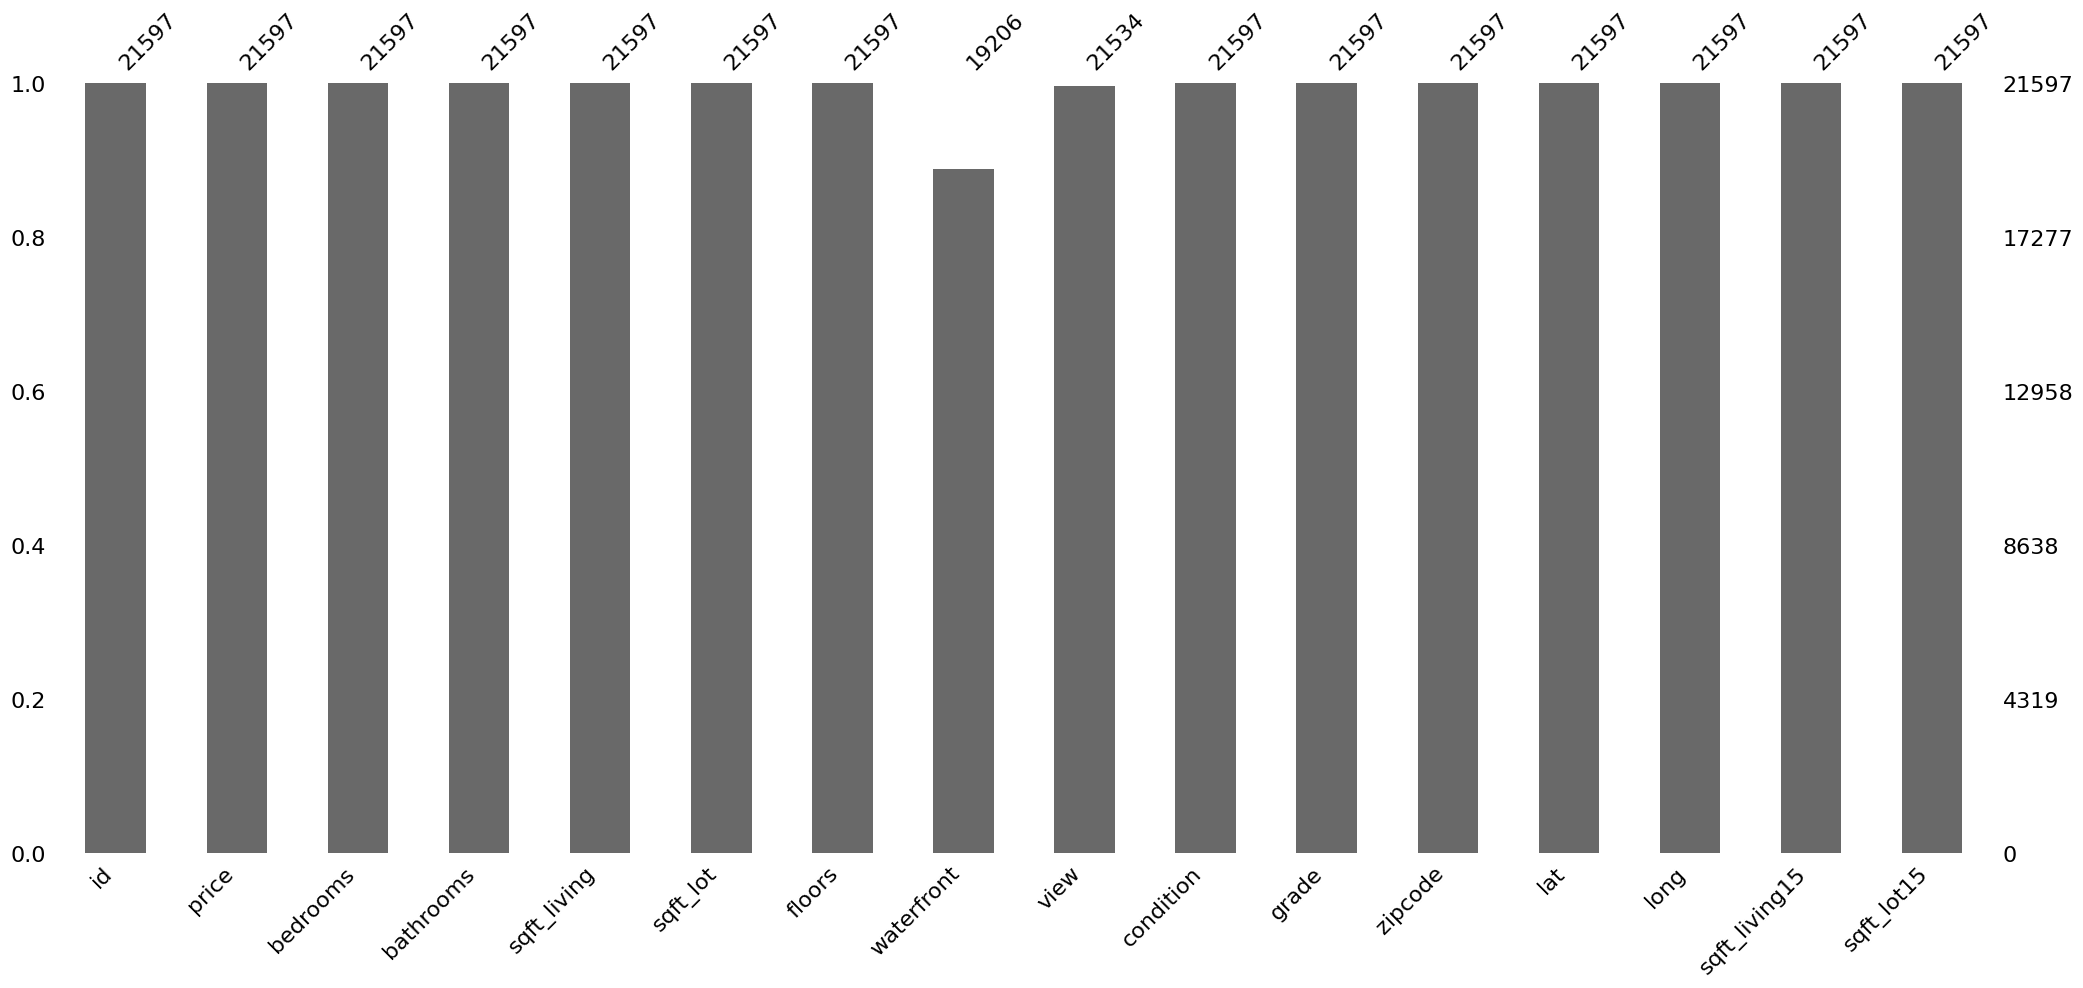

In [80]:
msno.bar(df_client_kcounty_housing)
print(f"numbers of rows : {df_client_kcounty_housing.shape[0]}")
print(f"missing values in Waterfront : {round(df_client_kcounty_housing.waterfront.isna().sum()/df_client_kcounty_housing.shape[0]*100,2)} %")
print(f"missing values in View : {round(df_client_kcounty_housing.view.isna().sum()/df_client_kcounty_housing.shape[0]*100,2)} %")
##so around 10% data missing, can delete those rows, same for views

In [81]:


df_client_kcounty_housing_cleaned = df_client_kcounty_housing
df_client_kcounty_housing_cleaned = df_client_kcounty_housing_cleaned.dropna()

df_client_kcounty_housing_cleaned.shape

(19149, 16)

In [82]:
df_client_kcounty_housing_cleaned = df_client_kcounty_housing_cleaned.astype({'waterfront': 'Int64'})
df_client_kcounty_housing_cleaned.waterfront.unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [83]:
df_client_kcounty_housing_cleaned = df_client_kcounty_housing_cleaned.astype({'view': 'Int64'})
df_client_kcounty_housing_cleaned = df_client_kcounty_housing_cleaned.astype({'price': 'Int64'})

df_client_kcounty_housing_cleaned.head(10)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,538000,3,2.250,2570.000,7242.000,2.000,0,0,3,7,98125,47.721,-122.319,1690.000,7639.000
2,5631500400,180000,2,1.000,770.000,10000.000,1.000,0,0,3,6,98028,47.738,-122.233,2720.000,8062.000
3,2487200875,604000,4,3.000,1960.000,5000.000,1.000,0,0,5,7,98136,47.521,-122.393,1360.000,5000.000
4,1954400510,510000,3,2.000,1680.000,8080.000,1.000,0,0,3,8,98074,47.617,-122.045,1800.000,7503.000
5,7237550310,1230000,4,4.500,5420.000,101930.000,1.000,0,0,3,11,98053,47.656,-122.005,4760.000,101930.000
6,1321400060,257500,3,2.250,1715.000,6819.000,2.000,0,0,3,7,98003,47.310,-122.327,2238.000,6819.000
8,2414600126,229500,3,1.000,1780.000,7470.000,1.000,0,0,3,7,98146,47.512,-122.337,1780.000,8113.000
9,3793500160,323000,3,2.500,1890.000,6560.000,2.000,0,0,3,7,98038,47.368,-122.031,2390.000,7570.000
11,9212900260,468000,2,1.000,1160.000,6000.000,1.000,0,0,4,7,98115,47.690,-122.292,1330.000,6000.000
12,114101516,310000,3,1.000,1430.000,19901.000,1.500,0,0,4,7,98028,47.756,-122.229,1780.000,12697.000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

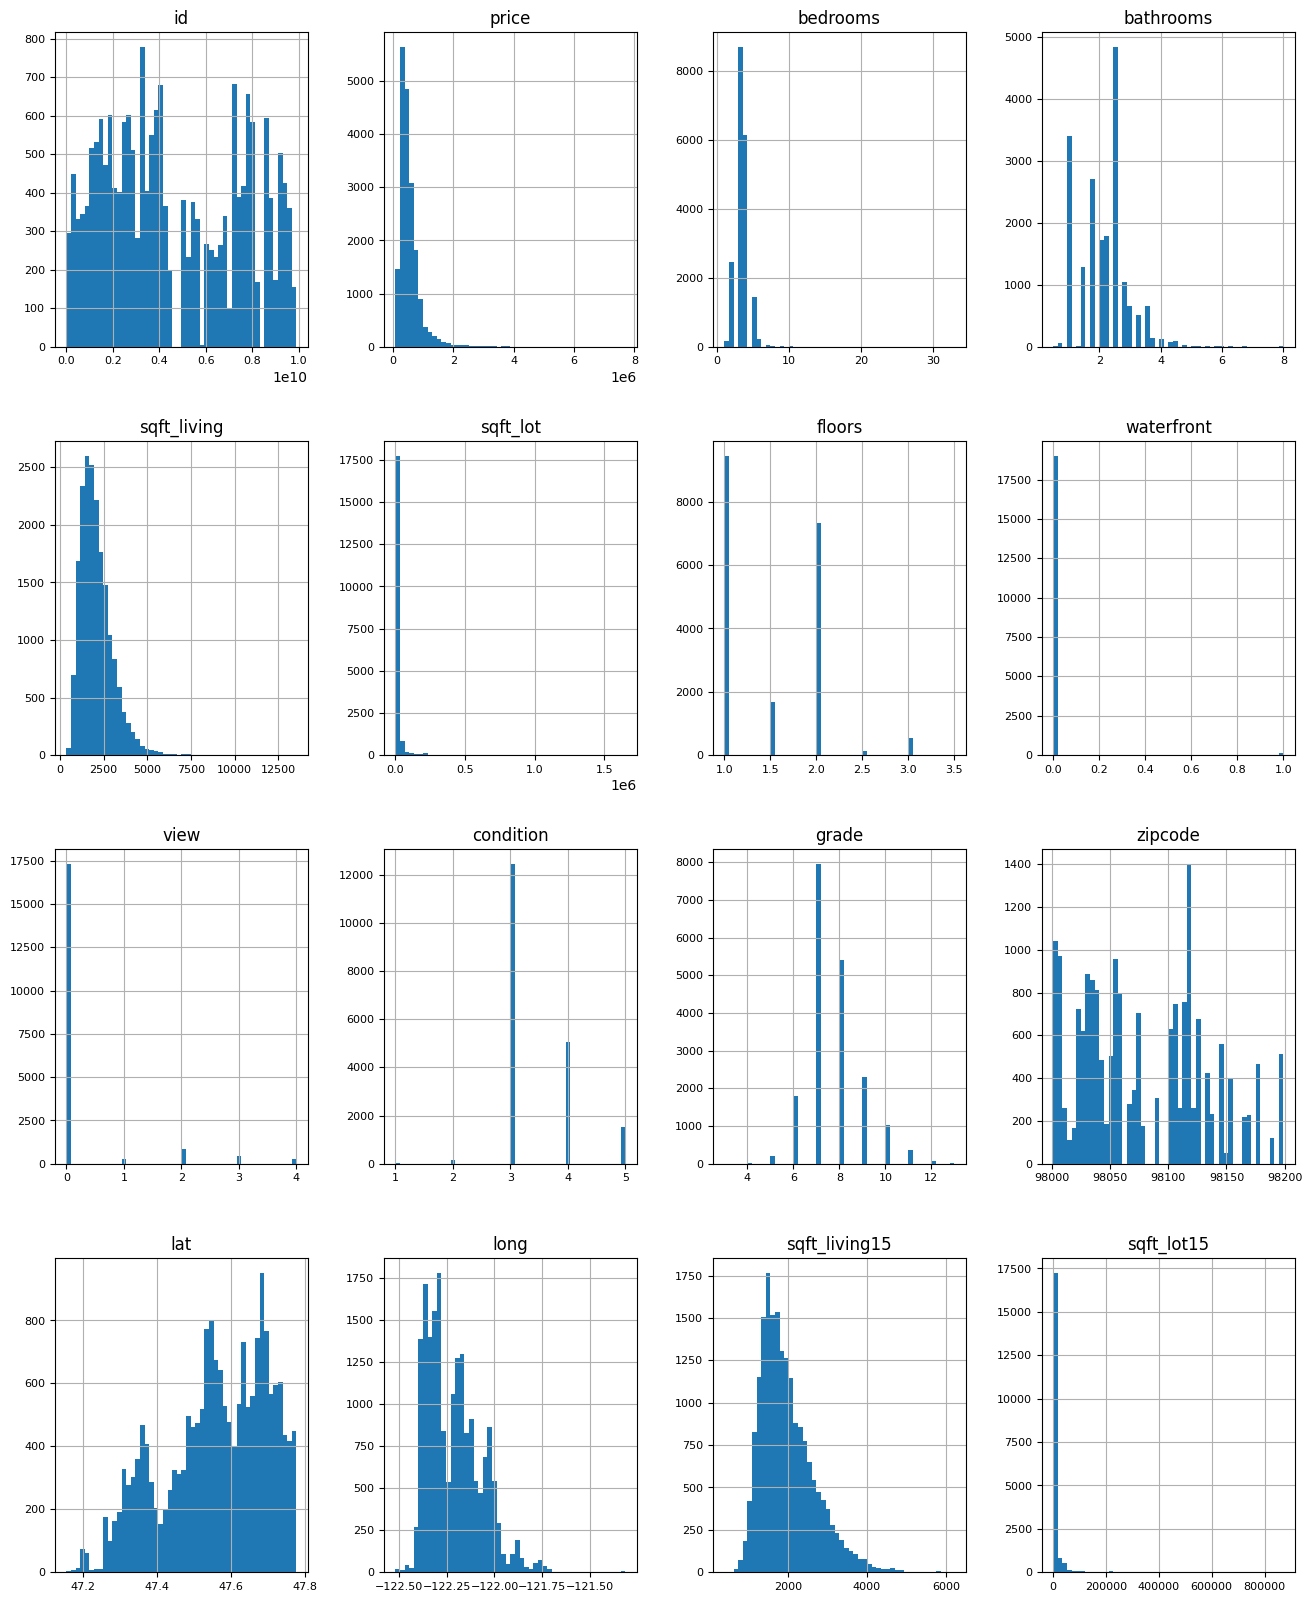

In [84]:
list(set(df_client_kcounty_housing_cleaned.dtypes.tolist()))
df_num = df_client_kcounty_housing_cleaned.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [85]:
df_client_kcounty_housing_cleaned.head(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,538000,3,2.250,2570.000,7242.000,2.000,0,0,3,7,98125,47.721,-122.319,1690.000,7639.000


In [86]:
df_client_kcounty_housing_corr = df_client_kcounty_housing_cleaned.drop(['id', 'lat', 'long', 'zipcode'], axis=1)
df_client_kcounty_housing_corr.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_living15,sqft_lot15
1,538000,3,2.250,2570.000,7242.000,2.000,0,0,3,7,1690.000,7639.000
2,180000,2,1.000,770.000,10000.000,1.000,0,0,3,6,2720.000,8062.000
3,604000,4,3.000,1960.000,5000.000,1.000,0,0,5,7,1360.000,5000.000
4,510000,3,2.000,1680.000,8080.000,1.000,0,0,3,8,1800.000,7503.000
5,1230000,4,4.500,5420.000,101930.000,1.000,0,0,3,11,4760.000,101930.000


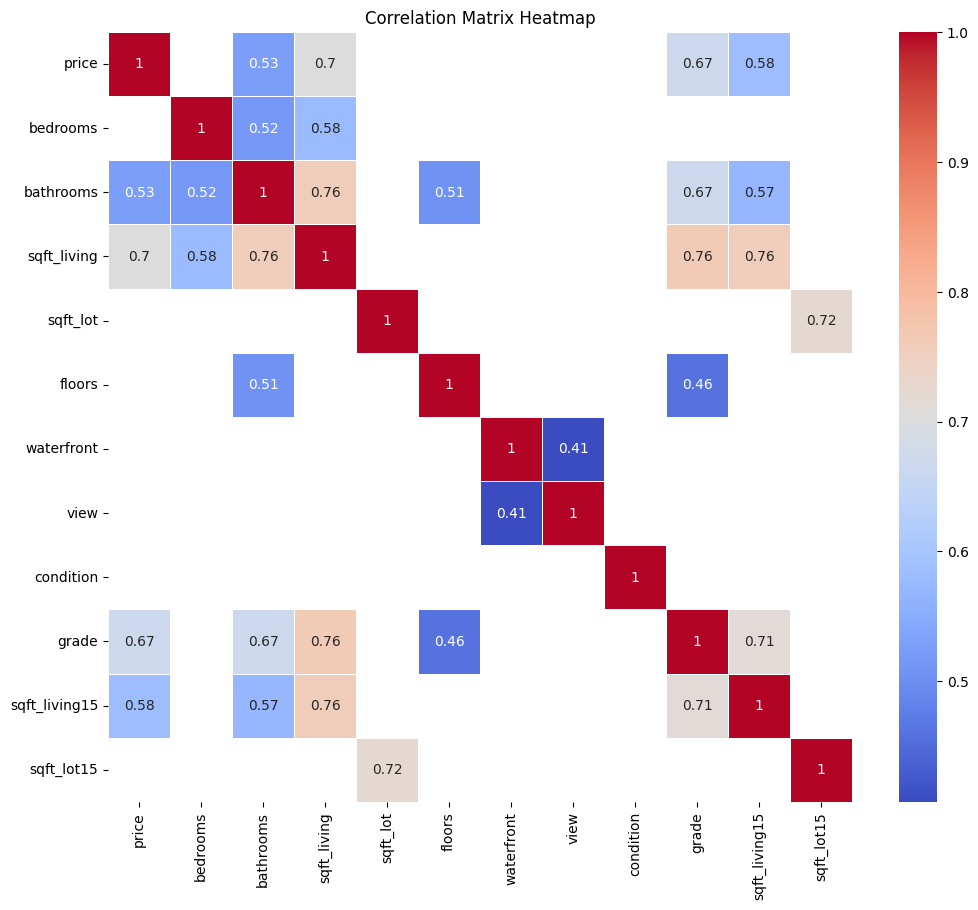

In [87]:
correlation_matrix = df_client_kcounty_housing_corr.corr()

# Create a heatmap of the correlation matrix with only showing correlation over 0.4
filtered_correlation_matrix = correlation_matrix[correlation_matrix >= 0.4]
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Research Question: Q1.Does having a house at waterfront and central location influence the price ?
Hypothesis <br> 
H1.1 Houses with waterfronts are higher priced than with none.<br>
H1.2 Houses that are central are higher priced. <br>
H1.3 Houses that have waterfront and central are priced  above the 50% of total price range of houses in king county.<br>


In [88]:
df_client_kcounty_housing_cleaned.zipcode.nunique()

70

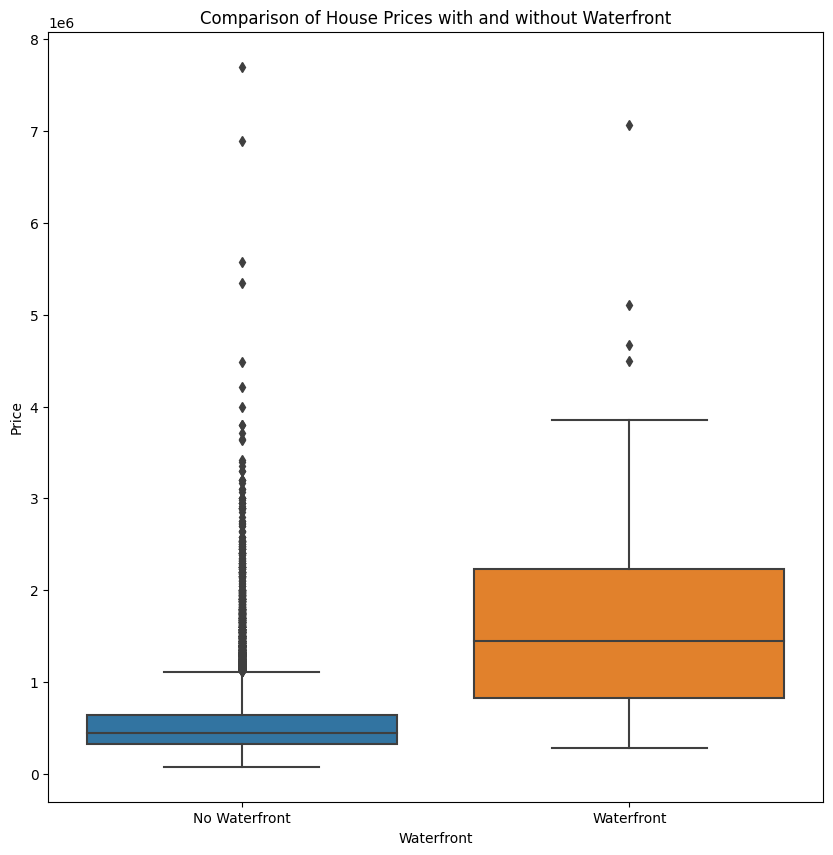

In [101]:
#H1.1 Houses with waterfronts are higher priced than with none.
plt.figure(figsize=(10, 10))
sns.boxplot(x='waterfront', y='price', data=df_client_kcounty_housing_cleaned)
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.title('Comparison of House Prices with and without Waterfront')
plt.xticks([0, 1], ['No Waterfront', 'Waterfront'])
plt.show()



Plot shows clearly that houses with waterfronts are typically higher priced. Hypothesis is approved

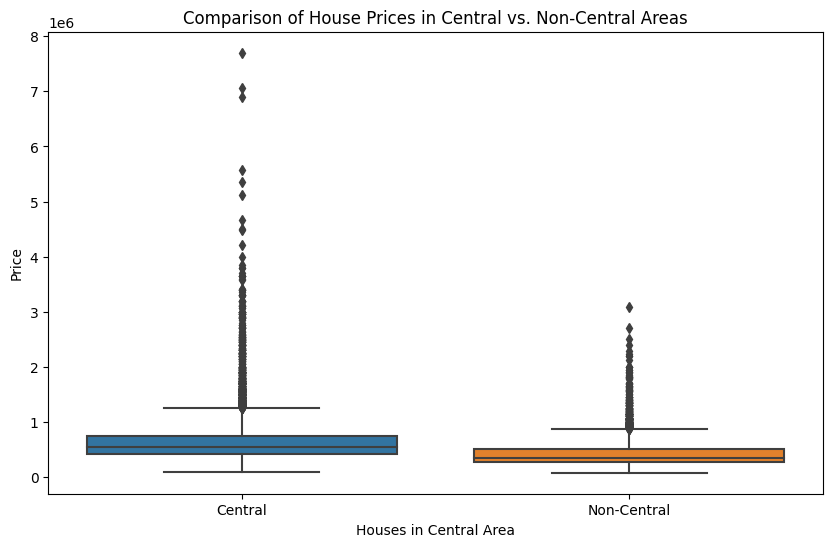

In [90]:
# Central area upper left   47.77 , -122.41 powered by google maps and density map from statisticatlas
# Central area lower right  47.52, -122.08

central_latitude_range = (47.52, 47.77)
central_longitude_range = (-122.41, -122.08)

# Create a new column 'central_area' based on the criteria
df_client_kcounty_housing_cleaned['central_area'] = df_client_kcounty_housing_cleaned.apply(lambda row: 'Central' if (
    central_latitude_range[0] <= row['lat'] <= central_latitude_range[1] and
    central_longitude_range[0] <= row['long'] <= central_longitude_range[1]
) else 'Non-Central', axis=1)


# Create a box plot to compare prices of houses in central vs. non-central areas
plt.figure(figsize=(10, 6))
sns.boxplot(x='central_area', y='price', data=df_client_kcounty_housing_cleaned)
plt.xlabel('Houses in Central Area')
plt.ylabel('Price')
plt.title('Comparison of House Prices in Central vs. Non-Central Areas')
plt.show()


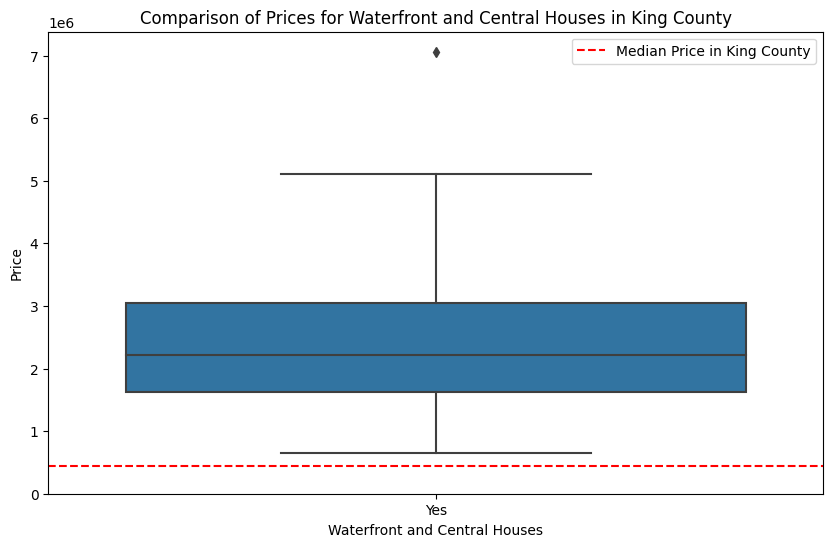

In [91]:
#Houses that have waterfront and central are priced  above the 50% of total price range of houses in king county.


# Define above 50% with above median price of all houses in King County
median_price_king_county = df_client_kcounty_housing_cleaned['price'].median()

central_latitude_range = (47.52, 47.77)
central_longitude_range = (-122.41, -122.08)
# new column 'waterfront_central' based on criteria
df_client_kcounty_housing_cleaned['waterfront_central'] = df_client_kcounty_housing_cleaned.apply(lambda row: 'Yes' if (
    row['waterfront'] == 1 and
    central_latitude_range[0] <= row['lat'] <= central_latitude_range[1] and
    central_longitude_range[0] <= row['long'] <= central_longitude_range[1]
) else 'No', axis=1)

# Filter the dataset to include only houses with waterfront and central location
waterfront_central_houses = df_client_kcounty_housing_cleaned[df_client_kcounty_housing_cleaned['waterfront_central'] == 'Yes']

# Create a box plot to compare prices of waterfront and central houses to the median price
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront_central', y='price', data=waterfront_central_houses)
plt.axhline(median_price_king_county, color='red', linestyle='--', label='Median Price in King County')
plt.xlabel('Waterfront and Central Houses')
plt.ylabel('Price')
plt.ylim(0, )
plt.title('Comparison of Prices for Waterfront and Central Houses in King County')
plt.legend()
plt.show()

So this meanns all houses that are central and located next to the water are priced above the median prices in King County.


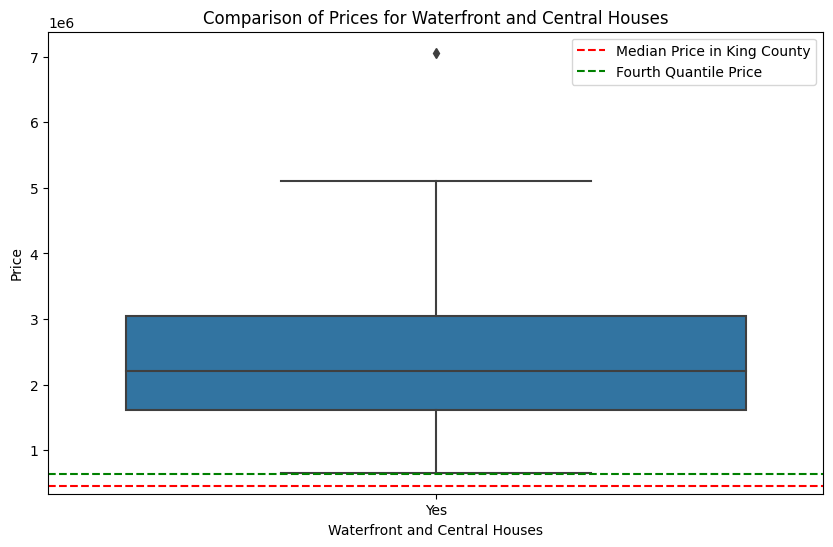

In [92]:
# checking if houses between median and 4th quantile exist because of limtited budget of Larry 

# fourth quantile (75th percentile) prices of all houses in King County
fourth_quantile_price = df_client_kcounty_housing_cleaned['price'].quantile(0.75)

# Check if any houses have prices between median and fourth quantile
houses_between_median_and_fourth_quantile = waterfront_central_houses[
    (waterfront_central_houses['price'] > median_price_king_county) &
    (waterfront_central_houses['price'] <= fourth_quantile_price)
]

plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront_central', y='price', data=waterfront_central_houses)
plt.axhline(median_price_king_county, color='red', linestyle='--', label='Median Price in King County')
plt.axhline(fourth_quantile_price, color='green', linestyle='--', label='Fourth Quantile Price')
plt.xlabel('Waterfront and Central Houses')
plt.ylabel('Price')
plt.title('Comparison of Prices for Waterfront and Central Houses')
plt.legend()
plt.show()
# Check if the hypothesis is true
#hypothesis_test_result = not houses_between_median_and_fourth_quantile.empty
#print("Hypothesis Test Result:", hypothesis_test_result)

so wishes of client need to adapt, lets check for prices for just central houses


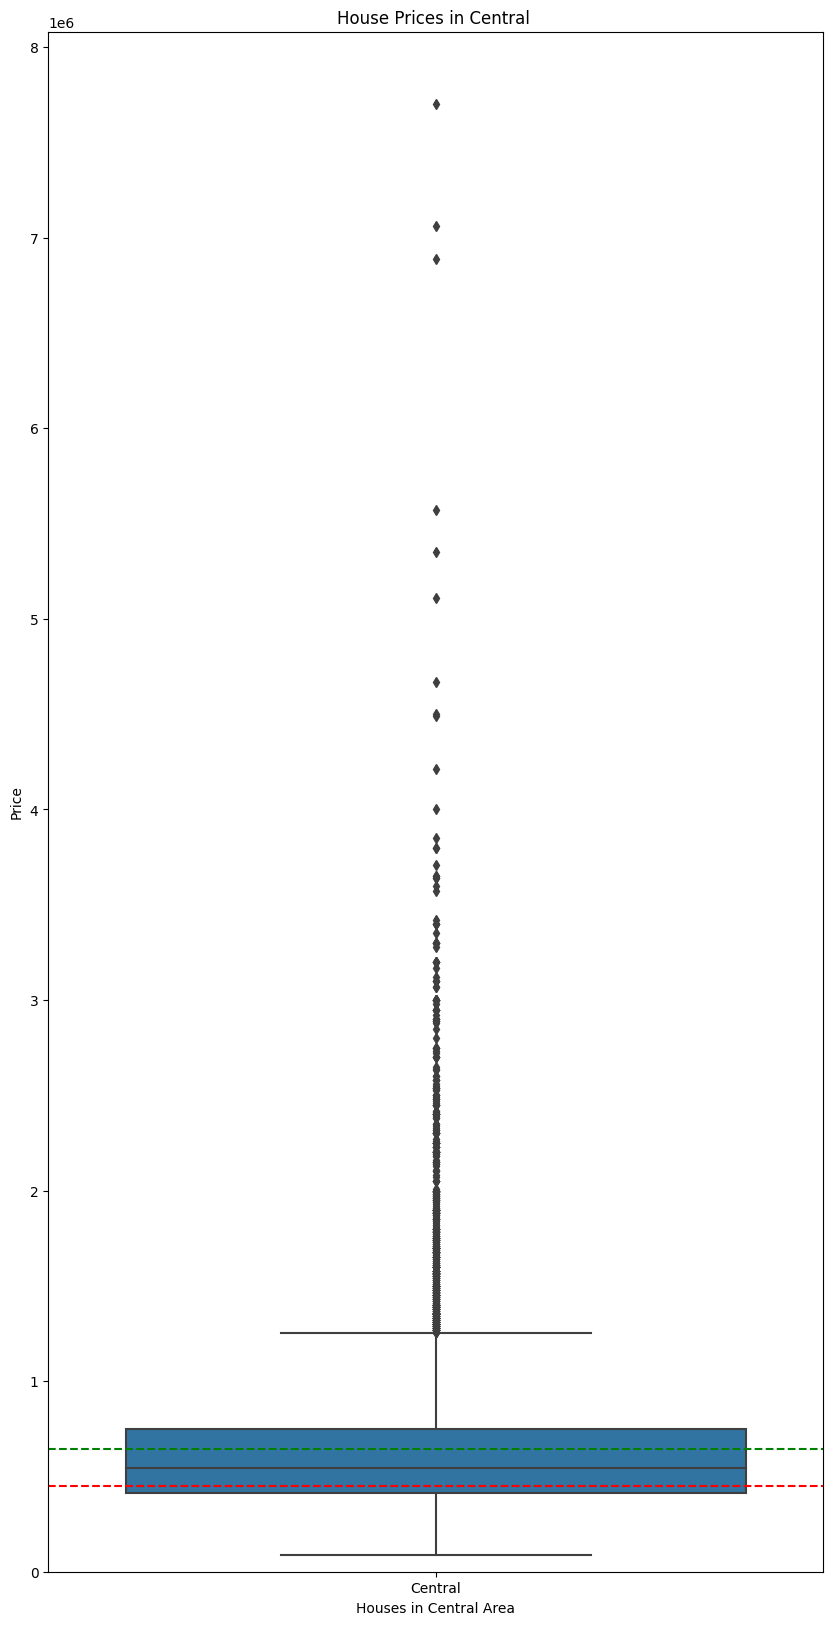

In [93]:
client_kcounty_housing_central = df_client_kcounty_housing_cleaned[df_client_kcounty_housing_cleaned['central_area'] == 'Central']

# Create a box plot to compare prices of houses in central vs. non-central areas
plt.figure(figsize=(10, 20))
sns.boxplot(x='central_area', y='price', data=client_kcounty_housing_central)
plt.axhline(median_price_king_county, color='red', linestyle='--', label='Median Price in King County')
plt.axhline(fourth_quantile_price, color='green', linestyle='--', label='Fourth Quantile Price')
plt.xlabel('Houses in Central Area')
plt.ylabel('Price')
plt.ylim(0,)
plt.title('House Prices in Central ')
plt.show()



Are there houses with waterfront for Larry's budget?

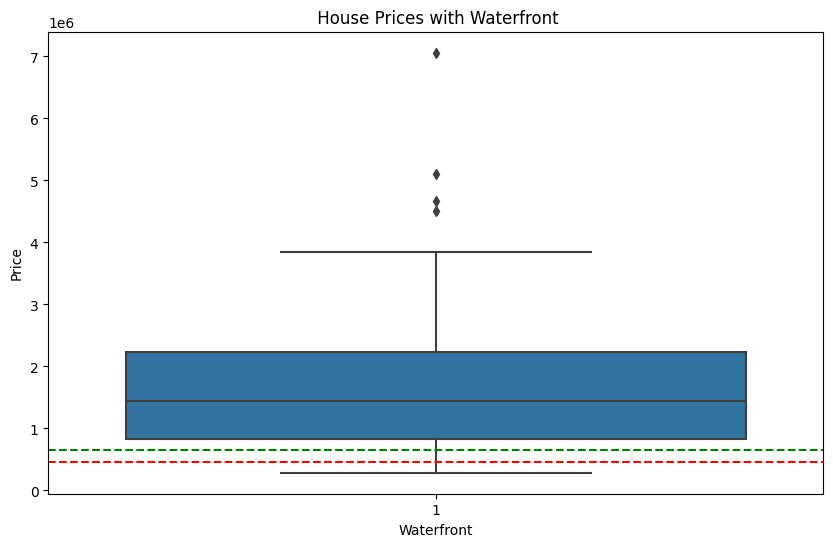

In [94]:
client_kcounty_housing_waterfront = df_client_kcounty_housing_cleaned[df_client_kcounty_housing_cleaned['waterfront'] == 1]

plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=client_kcounty_housing_waterfront)
plt.axhline(median_price_king_county, color='red', linestyle='--', label='Median Price in King County')
plt.axhline(fourth_quantile_price, color='green', linestyle='--', label='Fourth Quantile Price')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.title(' House Prices with Waterfront')
plt.show()


So comparing the last two plots it shows there are more houses in central area available in the budget than there is with waterfronts.
Getting a house at a waterfront will be very unlikely but not impossible as we have outliers that are even below the median price range.

Q2: Are there nice & isolated locations in the city center <br>
Here what is nice, nice condition or good overall grade. or a combination of both <br>
Need to define what Isolated means (e.g.:sqft_living15/sqft_lot15)

In [95]:
df_client_kcounty_housing_cleaned["Isolation_meter"] = df_client_kcounty_housing_cleaned["sqft_living15"]/df_client_kcounty_housing_cleaned["sqft_lot15"]
df_client_kcounty_housing_cleaned.head()

df_client_kcounty_housing_cleaned['Isolation_meter'].describe()
# isolationmeter factor over 0.4 is considered isolated enough 




count   19149.000
mean        0.307
std         0.227
min         0.001
25%         0.174
50%         0.246
75%         0.376
max         2.242
Name: Isolation_meter, dtype: float64

In [96]:
# Step 1: Define criteria
# Define "nice" as having a condition.
nice_condition_grade_threshold = 4
nice_grade_threshold = 9

# Define "isolated" as having a ratio of sqft_living15 to sqft_lot15 greater than 0.4
isolated_threshold = 0.4

# Define "central" based on latitude and longitude ranges.
central_latitude_range = (47.52, 47.77)
central_longitude_range = (-122.41, -122.08)

# Step 2: Create a new column 'nice_isolated_central' based on criteria
df_client_kcounty_housing_cleaned['nice_isolated_central'] = df_client_kcounty_housing_cleaned.apply(lambda row: 'Yes' if (
    (row['condition'] >= nice_condition_grade_threshold or row['grade'] >= nice_grade_threshold) and
    (row['sqft_living15'] / row['sqft_lot15']) > isolated_threshold and
    (central_latitude_range[0] <= row['lat'] <= central_latitude_range[1] and
     central_longitude_range[0] <= row['long'] <= central_longitude_range[1])
) else 'No', axis=1)

# Step 3: Check if any houses meet the combined criteria
houses_meeting_criteria = df_client_kcounty_housing_cleaned[df_client_kcounty_housing_cleaned['nice_isolated_central'] == 'Yes']

# Check if the hypothesis is true
hypothesis_test_result = not houses_meeting_criteria.empty

print("Hypothesis Test Result:", hypothesis_test_result)


Hypothesis Test Result: True


In [97]:
houses_meeting_criteria_waterfront = houses_meeting_criteria[houses_meeting_criteria['waterfront'] == 1]
houses_meeting_criteria_waterfront.head(20)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,central_area,waterfront_central,Isolation_meter,nice_isolated_central
8438,724069023,1250000,1,1.250,1810.000,5070.000,1.500,1,4,4,8,98075,47.581,-122.081,2280.000,5070.000,Central,Yes,0.450,Yes
11434,624069035,2750000,4,4.000,4130.000,5575.000,2.000,1,4,4,10,98075,47.597,-122.083,2980.000,5575.000,Central,Yes,0.535,Yes
20309,518500480,3000000,3,3.500,4410.000,10756.000,2.000,1,4,3,11,98056,47.528,-122.205,3550.000,5634.000,Central,Yes,0.630,Yes
21185,518500460,2230000,3,3.500,3760.000,5634.000,2.000,1,4,3,11,98056,47.529,-122.205,3560.000,5762.000,Central,Yes,0.618,Yes


These houses would be out of budget but could be cosidered except house id 724069023 with one bedroom (not children friendly)

In [98]:
# Define the price budget
price_budget = 750000

# Filter the DataFrame to include only houses that meet the combined criteria
houses_meeting_criteria = df_client_kcounty_housing_cleaned[ 
                             (df_client_kcounty_housing_cleaned['grade'] >= 9) &
                             (df_client_kcounty_housing_cleaned['central_area'] == 'Central' ) &
                             (df_client_kcounty_housing_cleaned['price'] < price_budget) &
                             (df_client_kcounty_housing_cleaned['Isolation_meter'] > 0.5)]

houses_meeting_criteria.shape

(128, 20)

In [99]:
houses_meeting_criteria_nicecentralbudgetiso = houses_meeting_criteria


In [103]:
houses_meeting_criteria_nicecentralbudgetiso.head(40)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,central_area,waterfront_central,Isolation_meter,nice_isolated_central
15,9297300055,650000,4,3.000,2950.000,5000.000,2.000,0,3,3,9,98126,47.571,-122.375,2140.000,4000.000,Central,No,0.535,Yes
134,2767602356,675000,4,3.500,2140.000,2278.000,3.000,0,0,3,9,98107,47.673,-122.380,1540.000,2285.000,Central,No,0.674,Yes
391,8857320070,490000,3,2.750,1980.000,3128.000,2.000,0,0,4,9,98008,47.611,-122.114,1950.000,2856.000,Central,No,0.683,Yes
405,9385200055,650000,3,3.250,1510.000,2000.000,2.000,0,0,3,9,98116,47.581,-122.402,1510.000,1352.000,Central,No,1.117,Yes
547,7899800860,259950,2,2.000,1070.000,649.000,2.000,0,0,3,9,98106,47.521,-122.357,1070.000,928.000,Central,No,1.153,Yes
626,7548300731,559950,3,2.500,1660.000,1458.000,3.000,0,0,3,9,98144,47.588,-122.309,1660.000,1784.000,Central,No,0.930,Yes
643,9385200045,729500,3,2.500,1660.000,1091.000,3.000,0,1,3,9,98116,47.582,-122.402,1510.000,1352.000,Central,No,1.117,Yes
818,5014600240,682000,5,2.750,2760.000,5000.000,2.000,0,0,3,9,98059,47.539,-122.188,2870.000,5030.000,Central,No,0.571,Yes
1106,2770604942,609850,2,2.750,1910.000,1369.000,3.000,0,0,3,9,98119,47.654,-122.373,1910.000,1879.000,Central,No,1.016,Yes
1317,1962200036,600000,3,1.750,1620.000,1325.000,2.500,0,0,3,9,98102,47.650,-122.321,1750.000,1572.000,Central,No,1.113,Yes


In [109]:
final_df = houses_meeting_criteria_nicecentralbudgetiso.sort_values(by=['price'], ascending=True)
final_df.head(20)
final_df.to_csv('final_df_housing_LarryS.csv', index=False)